<a href="https://colab.research.google.com/github/noahbean33/computational_physics_experiments/blob/main/quantum_many_body_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qutip numpy scipy matplotlib --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 14.5 MB/s eta 0:00:00


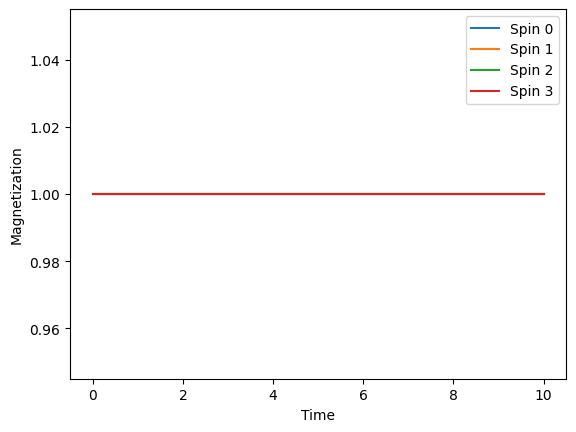

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 4  # Number of spins
J = 1.0  # Interaction strength
h = 0.5  # Magnetic field strength
t_list = np.linspace(0, 10, 100)  # Time points

# Pauli matrices
sx = sigmax()
sy = sigmay()
sz = sigmaz()

# Identity matrix
I = qeye(2)

# Build the Hamiltonian
H = 0
for n in range(N-1):
    H += -J * (tensor([I]*n + [sx, sx] + [I]*(N-n-2)) +
               tensor([I]*n + [sy, sy] + [I]*(N-n-2)) +
               tensor([I]*n + [sz, sz] + [I]*(N-n-2)))
for n in range(N):
    H += -h * tensor([I]*n + [sz] + [I]*(N-n-1))

# Initial state: All spins up
psi0 = tensor([basis(2, 0) for _ in range(N)])

# List of operators for measurement (magnetization of each spin)
sz_ops = [tensor([I]*n + [sz] + [I]*(N-n-1)) for n in range(N)]

# Time evolution
result = mesolve(H, psi0, t_list, [], sz_ops)

# Plot results
for n in range(N):
    plt.plot(t_list, result.expect[n], label=f'Spin {n}')
plt.xlabel('Time')
plt.ylabel('Magnetization')
plt.legend()
plt.show()


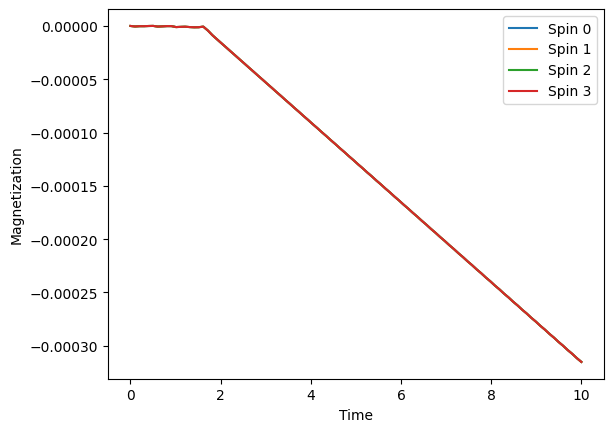

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 4  # Number of spins
J = 1.0  # Interaction strength
h = 0.5  # Magnetic field strength
t_list = np.linspace(0, 10, 100)  # Time points

# Pauli matrices
sx = sigmax()
sy = sigmay()
sz = sigmaz()

# Identity matrix
I = qeye(2)

# Build the Hamiltonian
H = 0
for n in range(N-1):
    H += -J * (tensor([I]*n + [sx, sx] + [I]*(N-n-2)) +
               tensor([I]*n + [sy, sy] + [I]*(N-n-2)) +
               tensor([I]*n + [sz, sz] + [I]*(N-n-2)))
for n in range(N):
    H += -h * tensor([I]*n + [sz] + [I]*(N-n-1))

# Initial state: Superposition of all spins up and all spins down
psi_up = tensor([basis(2, 0) for _ in range(N)])
psi_down = tensor([basis(2, 1) for _ in range(N)])
psi0 = (psi_up + psi_down).unit()

# List of operators for measurement (magnetization of each spin)
sz_ops = [tensor([I]*n + [sz] + [I]*(N-n-1)) for n in range(N)]

# Time evolution
result = mesolve(H, psi0, t_list, [], sz_ops)

# Plot results
for n in range(N):
    plt.plot(t_list, result.expect[n], label=f'Spin {n}')
plt.xlabel('Time')
plt.ylabel('Magnetization')
plt.legend()
plt.show()


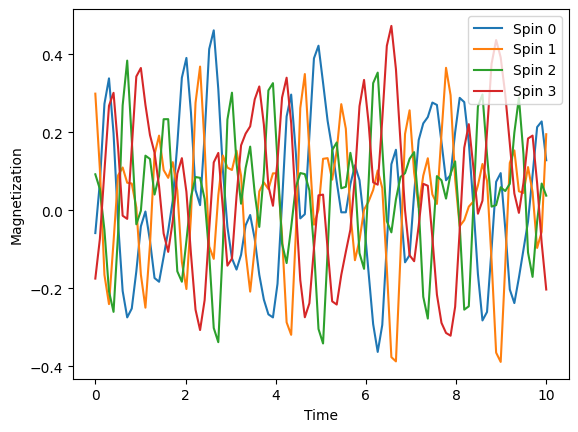

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 4  # Number of spins
J = 2.0  # Increased interaction strength
h = 1.0  # Increased magnetic field strength
t_list = np.linspace(0, 10, 100)  # Time points

# Pauli matrices
sx = sigmax()
sy = sigmay()
sz = sigmaz()

# Identity matrix
I = qeye(2)

# Build the Hamiltonian
H = 0
for n in range(N-1):
    H += -J * (tensor([I]*n + [sx, sx] + [I]*(N-n-2)) +
               tensor([I]*n + [sy, sy] + [I]*(N-n-2)) +
               tensor([I]*n + [sz, sz] + [I]*(N-n-2)))
for n in range(N):
    H += -h * tensor([I]*n + [sz] + [I]*(N-n-1))

# Initial state: Random superposition
np.random.seed(42)  # For reproducibility
random_state = (np.random.rand(2**N) + 1j * np.random.rand(2**N))
random_state = random_state / np.linalg.norm(random_state)
psi0 = Qobj(random_state, dims=[[2]*N, [1]*N])

# List of operators for measurement (magnetization of each spin)
sz_ops = [tensor([I]*n + [sz] + [I]*(N-n-1)) for n in range(N)]

# Time evolution
result = mesolve(H, psi0, t_list, [], sz_ops)

# Plot results
for n in range(N):
    plt.plot(t_list, result.expect[n], label=f'Spin {n}')
plt.xlabel('Time')
plt.ylabel('Magnetization')
plt.legend()
plt.show()


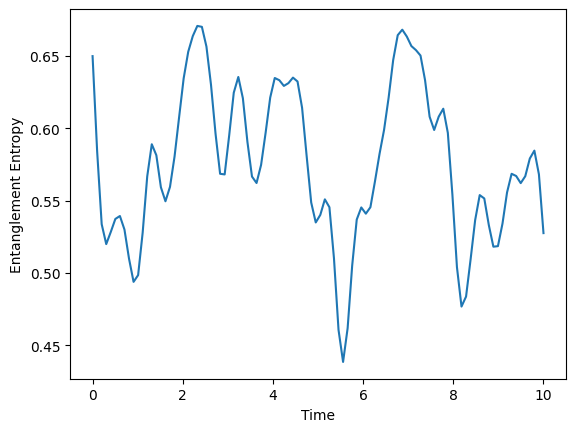

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 4  # Number of spins
J = 1.0  # Interaction strength
h = 0.5  # Magnetic field strength
t_list = np.linspace(0, 10, 100)  # Time points

# Pauli matrices
sx = sigmax()
sy = sigmay()
sz = sigmaz()

# Identity matrix
I = qeye(2)

# Build the Hamiltonian
H = 0
for n in range(N-1):
    H += -J * (tensor([I]*n + [sx, sx] + [I]*(N-n-2)) +
               tensor([I]*n + [sy, sy] + [I]*(N-n-2)) +
               tensor([I]*n + [sz, sz] + [I]*(N-n-2)))
for n in range(N):
    H += -h * tensor([I]*n + [sz] + [I]*(N-n-1))

# Initial state: Random superposition
np.random.seed(42)  # For reproducibility
random_state = (np.random.rand(2**N) + 1j * np.random.rand(2**N))
random_state = random_state / np.linalg.norm(random_state)
psi0 = Qobj(random_state, dims=[[2]*N, [1]*N])

# Time evolution
result = mesolve(H, psi0, t_list, [])

# Calculate entanglement entropy for the first half of the system
ent_entropy = []
for psi in result.states:
    rho_subsystem = psi.ptrace([0, 1])  # Trace out the second half
    ent_entropy.append(entropy_vn(rho_subsystem))

# Plot entanglement entropy
plt.plot(t_list, ent_entropy)
plt.xlabel('Time')
plt.ylabel('Entanglement Entropy')
plt.show()


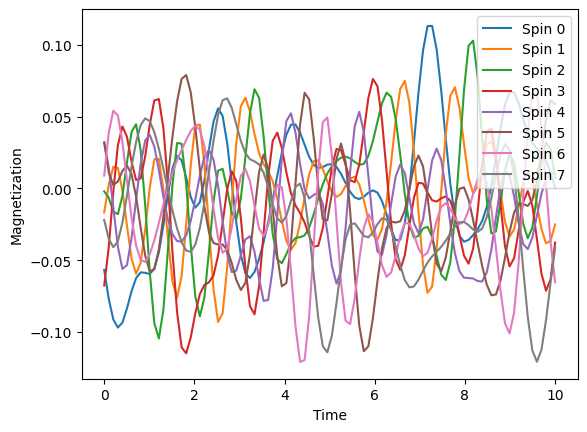

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 8  # Number of spins, increased for larger systems
J = 1.0  # Interaction strength
h = 0.5  # Magnetic field strength
t_list = np.linspace(0, 10, 100)  # Time points

# Pauli matrices
sx = sigmax()
sy = sigmay()
sz = sigmaz()

# Identity matrix
I = qeye(2)

# Build the Hamiltonian for a 1D spin chain
H = 0
for n in range(N-1):
    H += -J * (tensor([I]*n + [sx, sx] + [I]*(N-n-2)) +
               tensor([I]*n + [sy, sy] + [I]*(N-n-2)) +
               tensor([I]*n + [sz, sz] + [I]*(N-n-2)))
for n in range(N):
    H += -h * tensor([I]*n + [sz] + [I]*(N-n-1))

# Initial state: Random superposition
np.random.seed(42)  # For reproducibility
random_state = (np.random.rand(2**N) + 1j * np.random.rand(2**N))
random_state = random_state / np.linalg.norm(random_state)
psi0 = Qobj(random_state, dims=[[2]*N, [1]*N])

# Time evolution
result = mesolve(H, psi0, t_list, [])

# Calculate and plot magnetization
sz_ops = [tensor([I]*n + [sz] + [I]*(N-n-1)) for n in range(N)]
magnetization = expect(sz_ops, result.states)

for n in range(N):
    plt.plot(t_list, magnetization[n], label=f'Spin {n}')
plt.xlabel('Time')
plt.ylabel('Magnetization')
plt.legend()
plt.show()


In [7]:
# Build the Hamiltonian for the Ising model
H_ising = 0
for n in range(N-1):
    H_ising += -J * tensor([I]*n + [sz, sz] + [I]*(N-n-2))
for n in range(N):
    H_ising += -h * tensor([I]*n + [sx] + [I]*(N-n-1))

# Time evolution with Ising Hamiltonian
result_ising = mesolve(H_ising, psi0, t_list, [])


In [8]:
# Introduce random disorder in the magnetic field
h_random = h * (1 + 0.1 * (2 * np.random.rand(N) - 1))
H_disordered = 0
for n in range(N-1):
    H_disordered += -J * (tensor([I]*n + [sx, sx] + [I]*(N-n-2)) +
                          tensor([I]*n + [sy, sy] + [I]*(N-n-2)) +
                          tensor([I]*n + [sz, sz] + [I]*(N-n-2)))
for n in range(N):
    H_disordered += -h_random[n] * tensor([I]*n + [sz] + [I]*(N-n-1))

# Time evolution with disordered Hamiltonian
result_disordered = mesolve(H_disordered, psi0, t_list, [])


In [10]:
# Define collapse operators for an open quantum system
c_ops = [np.sqrt(0.1) * tensor([I]*n + [sz] + [I]*(N-n-1)) for n in range(N)]

# Time evolution with collapse operators
result_open = mesolve(H, psi0, t_list, c_ops, sz_ops)


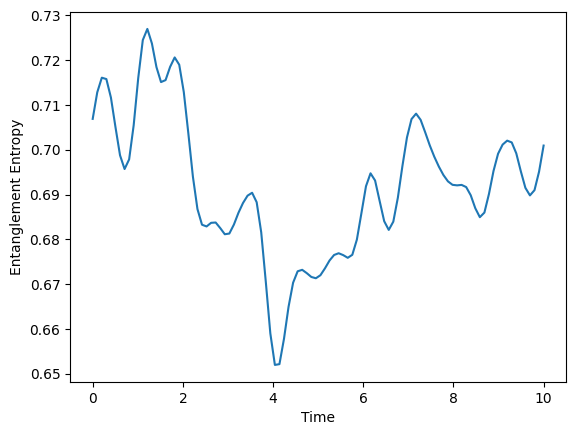

In [12]:
# Calculate and plot entanglement entropy
ent_entropy = []
for psi in result.states:
    rho_subsystem = psi.ptrace([0, 1])  # Trace out the second half
    ent_entropy.append(entropy_vn(rho_subsystem))

plt.plot(t_list, ent_entropy)
plt.xlabel('Time')
plt.ylabel('Entanglement Entropy')
plt.show()
